In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

In [2]:
class1 = 500
class2 = 50
centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = [1.5, 0.5]
X, y = make_blobs(n_samples=[class1, class2]
                  , centers=centers
                  , cluster_std=clusters_std
                  , random_state=0, shuffle=False
                  )

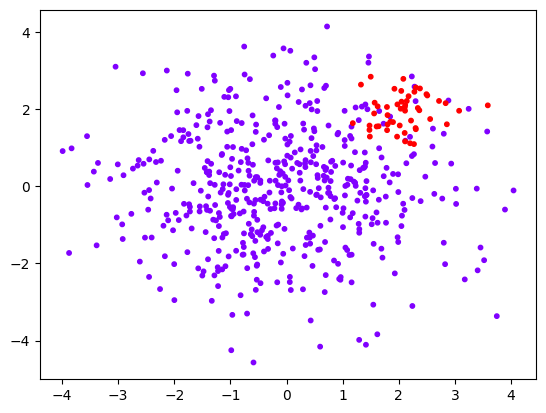

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow', s=10)
plt.show()

In [5]:
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

SVC(kernel='linear')

In [6]:
wclf = svm.SVC(kernel='linear', class_weight={1: 10})
wclf.fit(X, y)

SVC(class_weight={1: 10}, kernel='linear')

In [8]:
clf.score(X, y)

0.9418181818181818

In [9]:
wclf.score(X, y)

0.9127272727272727

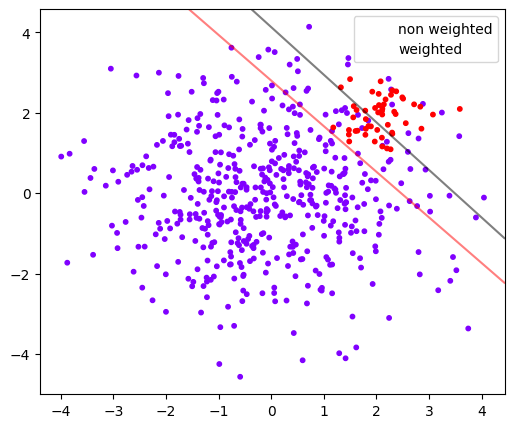

In [14]:
#首先要有数据分布
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="rainbow", s=10)
ax = plt.gca()  #获取当前的子图，如果不存在，则创建新的子图

#绘制决策边界的第一步：要有网格
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# 第二步：找出我们样本点到决策边界的距离
Z_clf = clf.decision_function(xy).reshape(XX.shape)
a = ax.contour(XX, YY, Z_clf, colors='black', levels=[0], alpha=0.5, linestyles=['-'])

Z_wclf = wclf.decision_function(xy).reshape(XX.shape)
b = ax.contour(XX, YY, Z_wclf, colors='red', levels=[0], alpha=0.5, linestyles=['-'])

# 第三步：画图例
plt.legend([a.collections[0], b.collections[0]], ["non weighted", "weighted"], loc='upper right')
plt.show()

In [15]:
a.collections  #调用这个等高线对象中画的所有线，返回一个惰性对象

<a list of 1 PathCollection objects>

In [16]:
#用[*]把它打开试试看
[*a.collections]  #返回了一个linecollection对象，其实就是我们等高线里所有的线的列表

In [17]:
#现在我们只有一条线，所以我们可以使用索引0来锁定这个对象
a.collections[0]
#plt.legend([对象列表],[图例列表],loc)
#只要对象列表和图例列表相对应，就可以显示出图例

In [18]:
(y[y == clf.predict(X)] == 1).sum() / (clf.predict(X) == 1).sum()

0.7142857142857143

In [19]:
(y[y == wclf.predict(X)] == 1).sum() / (wclf.predict(X) == 1).sum()

0.5102040816326531

In [20]:
# 特异度
#所有被正确预测为0的样本 / 所有的0样本
#对于没有class_weight，没有做样本平衡的灰色决策边界来说：
(y[y == clf.predict(X)] == 0).sum() / (y == 0).sum()

0.976

In [21]:
#对于有class_weight，做了样本平衡的红色决策边界来说：
(y[y == wclf.predict(X)] == 0).sum() / (y == 0).sum()

0.904